# 🎚 ACF
Try guessing the full name... yeah give it a try. I am watching you 🤨 

> Okay it is: *Autocorrelation-function* <br>
It's fine if you didn't get it, or said: Autocovariance ... **FOCUS**! It is *Auto-Co**rrelation***! not Co***variance***!

######

## 🔎 We will search for the value of `q`
Previously we looked at the `ADF` test to determine the value of `d` parameter. Now it is the time to have a look at `q` parameter which if you remember is used in MA model. For MA(q).

## Autocovariance

Here, similar to *auto-covariance* we will find the *auto-correlation*. Which again is the ***"correlation of 2 different values from the same time-series"***.

# $$ cor(t_1, t_2) = \frac{cov(t_1, t_2)}{\sigma_{t_1}, \sigma_{t_2}}$$ 

# $$ cov(t_1, t_2) = (x - \bar x)(y - \bar y) $$

### But... how to get the correlation?
Not asking the formulae, that we already know... but the thing is that since we have **only one value to compare with one value** how are we supposed to get the correlation?

As we know, to get the correlation, we need more than 2 values at least. Meaning:

|        | **y1** | **y2** | **y3** | **y4** | **y5** |
|--------|--------|--------|--------|--------|--------|
| **v1** |   12   |   34   |   44   |   55   |   33   |
| **v2** |   13   |   44   |   43   |   12   |   44   |
| **v3** |    3   |   34   |   44   |   33   |   44   |

For each `y` value there should be *multiple versions* so that we can get the correlation. Now, you may ask this is possible in the seasonality! If we take suppose period as `12` say, then there are the ***versions*** of all values right?

That's what it does! The further explanation is below this section but based on the *period* ($\tau$) we will get the auto-correlation for each point and then divide by some value (which we will see in just a sec) and get ***whole autocorrelation*** for **that tau $\tau$**.

### Autocorrelation formulae:

The formulae *assumes* that the time-series is stationary. That means the mean and variance don't change over time. Thus, based on that *strong assumption* we will get our work done!

And the guyz behind the stats have given a ***rotated sigma*** symbol for the *autocorrelation* to distinguish it with the *simple correlation*! Which is: $\varrho$. Written in LaTeX as `\varrho`.

# $$ \varrho(\tau) = \frac{\displaystyle \sum_{t=1}^{T-\tau} (y_t - \hat \mu) (y_{t + \tau} - \hat \mu)} {(T - \tau) \hat \sigma^2}$$ 

This is simple, <br>
**Numerator:** is simple autocovariance formula. That is for the 2 values on different time stamps. From 1 to $T-\tau$. <br>
**Denominator:** is also simple because that is just $T-\tau$ multiplied by $\sigma^2$.


After doing the math, you will find a **single number** between -1 and 1 as the measure of correlation for the given $\tau$. And we will take different values of $\tau$ from say 1 to 30. Meaning, the distance between $t_1$ and $t_2$ will be 1, then 2, till 30. And for each of those distances, we will get the *autocorrelation $\varrho$*.

> Plotting them on the graph will give us the ACF.

And, ***ACF is also known as <u>correlogram</u>.***

###### 

### 🤭 Is it that simple? 
Yeah! ACF is just the *plot* of a bunch of autocorrelations over the taus!

<img src="../images/acf.png" width=400 height=300>

- Note there, when the $\tau$ is 0, the $\varrho$ is 1. That makes sense because the correlation of same series with same series is just 1.
- When we use the ***lag*** meaning the $\tau$, the series is *shifted* by $\tau$ units and if then we find the $\varrho$ it gives different autocorrelation values.
- The **blue-region** in the plot is the confidence interval. The smaller is better. 
- That is found using the alpha value `0.05`. Thus, if any $\varrho$ gets outside of that region, then that $\varrho$ is by error. That is not reliable. But still there are 5% chances of that error to be made.

##### 🐾 Which value to choose then?
- We must choose the higher value for the $\tau$.
- But if we are getting low autocorrelation for the high $\tau$, then we should check for the $\tau$ before that.
- In short, we need to find the *peak* after which the autocorrelation falls.
- Here, we will choose the $\tau$ as `2`. Because after that all $\varrho$ are smaller.
- Since the $\varrho$ in 2 is **outside** of the confidence interval, we will keep that because there are no other values to keep which are high and inside the blue-region.
- If there were another high $\varrho$ but inside of the blue region, then we would have chosen that one instead of `2`. But here is not the case.

We will soon take the example to illustrate the same. 

#### Then what?
Great! You have your *optimal* `q`! Aren't you happy? You should be man! Now you've found the `q`. Let's see that in action in the code below.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

from statsmodels.graphics.tsaplots import plot_acf

Let's start making the random numbers and then see the whether do we get the result or not.

In [13]:
seed = np.random.RandomState(42)

###### 

#### Complelety Random

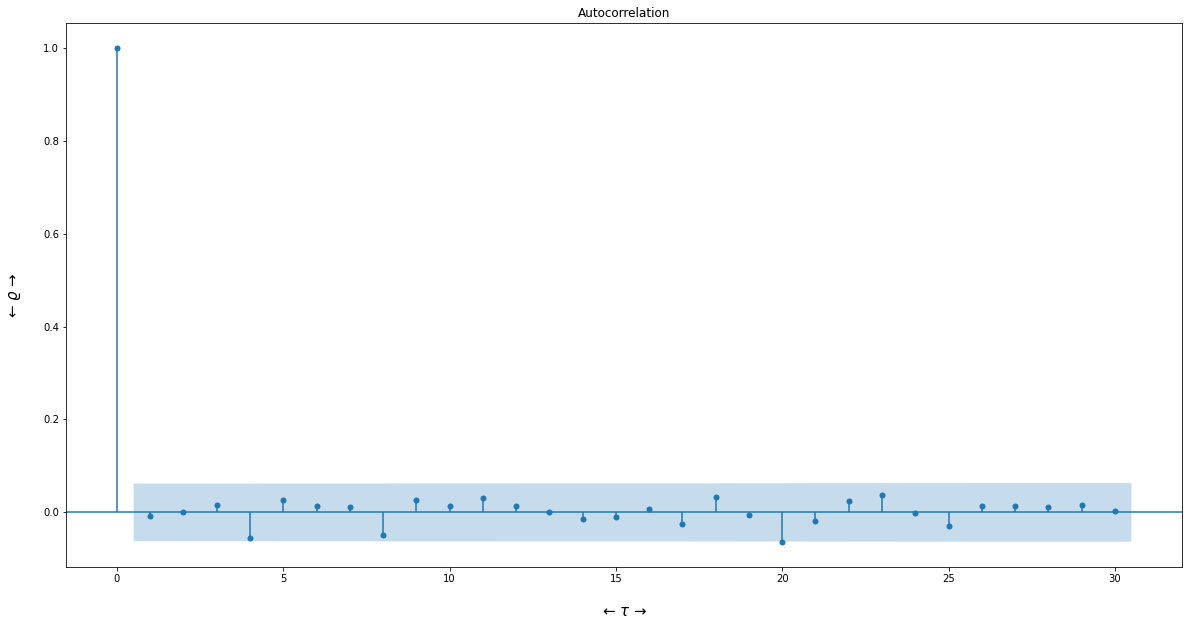

In [14]:
x = seed.randn(1000)
plot_acf(x)
plt.xlabel("← $\\tau$ →", labelpad=20, fontdict={"size":15})
plt.ylabel("← $\\varrho$ →", labelpad=20, fontdict={"size":15});

As expected, we can see that **there is no relation** between any point except the piint with it self at $\tau=0$. That satisfies out hypothesis that the random values are not correlated with themselves.

#### Based on past 1 error

In [15]:
# taking all errors and storing in the errors which
# are generated in the gaussian distribution
errors = seed.randn(1000)
# we could generate on-the-fly like seed.randn()
# each time in the loop but I like this way for now.

# here we will store the data, a time-series data.
# used x1 because that is based upon past 1 error
x1 = []

for i in range(1000):
    #           coef  past error    current error    
    new_point = 0.4 * errors[i-1] + errors[i]
    x1.append(new_point)
    
x1 = np.array(x1)

🤔 **Wondering?** <br>
In the first iteration, if there is no previous error... then how can we use the `[-1]` syntax?

The answer is that, we have use the last error in the errros, as they all are independent when generated and that makes no difference what I pick. So to make the code simple. Otherwise I would have to write:

```python
for i in range(1000):
    if i == 0: # for first time only
        new_point = errors[i]
    else:
        new_point = 0.4 * errors[i-1] + errors[i]
```
See? Each time we will need to do the check which will cost the O(1) time! Man!

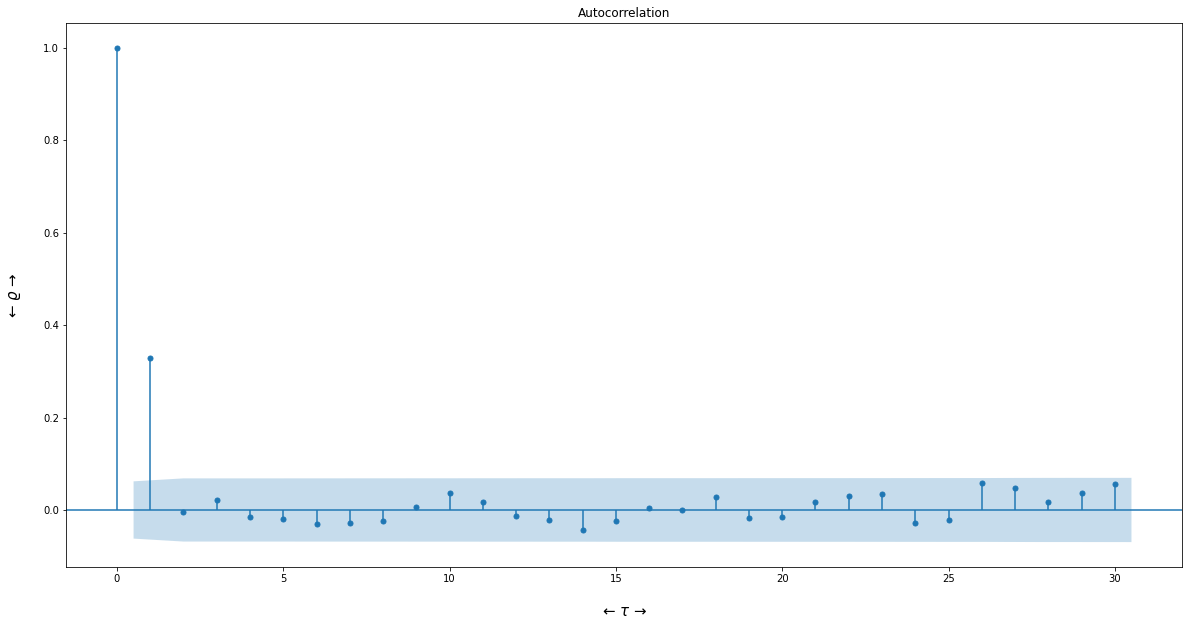

In [16]:
plot_acf(x1)
plt.xlabel("← $\\tau$ →", labelpad=20, fontdict={"size":15})
plt.ylabel("← $\\varrho$ →", labelpad=20, fontdict={"size":15});

Here we go! Here we can see that clearly, the errors are dependent on the past 1 value. Thus, in this case if we didn't know the data, we would choose `q` as 1.

#### Based on past 2 errors

In [20]:
errors = seed.randn(1000)
x2 = []

for i in range(1000):
    new_point = 0.4 * errors[i-1] \
                - 0.3 * errors[i-2] + errors[i]
    x2.append(new_point)
    
x2 = np.array(x2)

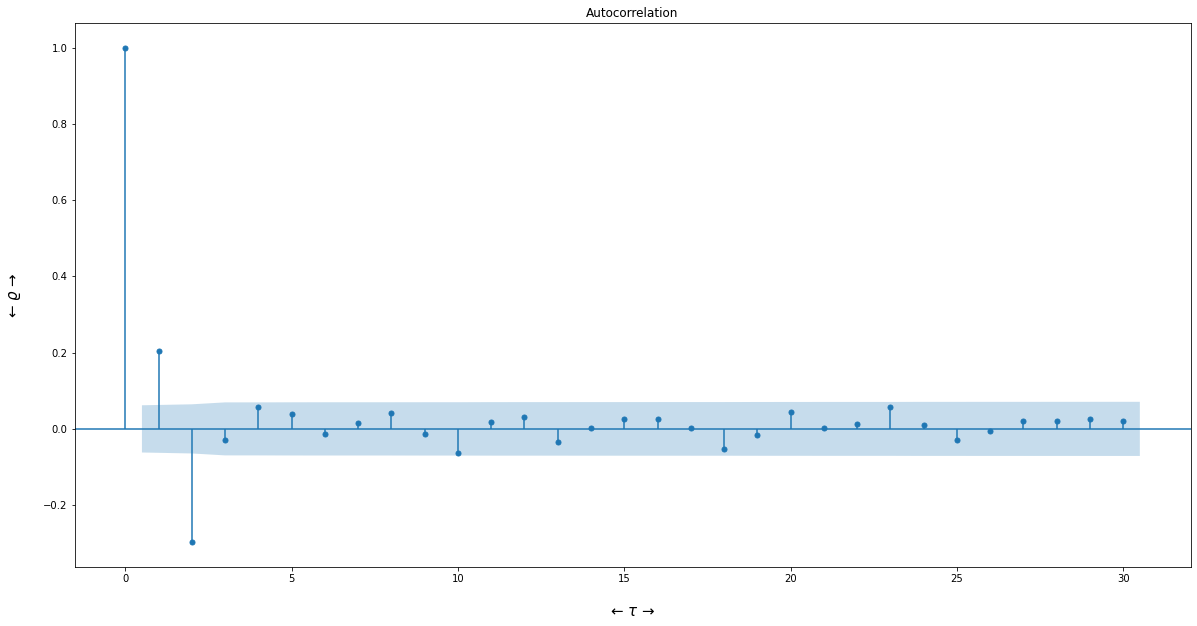

In [21]:
plot_acf(x2)
plt.xlabel("← $\\tau$ →", labelpad=20, fontdict={"size":15})
plt.ylabel("← $\\varrho$ →", labelpad=20, fontdict={"size":15});

Again, the ACF is at our help. Here we would choose `q` as 2.

#### Based on past 6 errors (!!!)

In [22]:
errors = seed.randn(1000)
x6 = []

for i in range(1000):
    new_point = 0.4 * errors[i-1] \
                +0.2 * errors[i-2] \
                -0.4 * errors[i-3] \
                +0.5 * errors[i-4] \
                -0.4 * errors[i-5] \
                -0.3 * errors[i-6] + errors[i]
    x6.append(new_point)
    
x6 = np.array(x6)

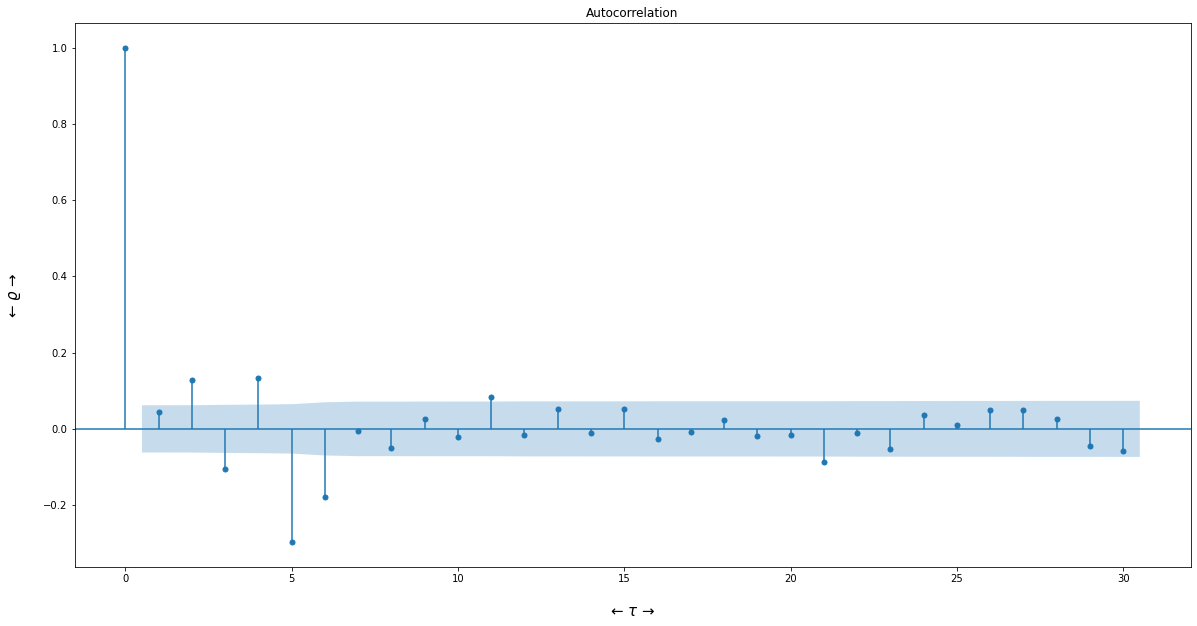

In [23]:
plot_acf(x6)
plt.xlabel("← $\\tau$ →", labelpad=20, fontdict={"size":15})
plt.ylabel("← $\\varrho$ →", labelpad=20, fontdict={"size":15});

Here we see that the higheast non-zero $\tau$ is 6. Thus we would choose that, *but still* we can see the value of $\tau$ goes outside of the confidence interval is 21. As per the statistical tests, we can ignore that value as there is 5% of the room for the error here. And also we would prefer the **simpler** model, thus instead of taking `q = 21` we would take `q = 6`.

# 

# I know, I know
We have not seen the real world examples here, but trust me these ACF and PACF will help you to get values for `q` and `p` really nicely. We will use these plots if we are going to deal with the examples in the upcoming noteoboks but for now, that's for the intuition!

In the next book, we will talk about another technique called PACF! Get excited.